**ABSTRACT:**

Finding a website for the **"Programming for Data Analytics"** CA was its most important task, I started looking for it. After conducting a thorough research using Google website search, I decided to scrape data from the "Book Depository" website. In this we also used a cloud-based MongoDB database to store the data that we scraped from website.

pip install beautifulsoup4

**LIBRARIES:**

I have imported all the necessary libraries which we need.



In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
from lxml import html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

URL of the website

In [2]:
url='https://www.bookdepository.com/bestsellers'

Checking response of the url which we have requested using "request.get(url)"

In [3]:
resp=requests.get(url)
resp

<Response [200]>

Got 200 Ok response

# Scraping Each Features Individually From "Book Depository" Website

**1) Format:** 

Book has total 11 Formats and out of this most popular formats are "Paperback" and "Hardback".

I have converted formats into pandas series.

In [4]:
Page = 1
all_Format = []
for Page in range(35):
    url = f"https://www.bookdepository.com/bestsellers?page={Page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")
    formats_on_page = soup.select("div.item-info p.format")
    for product_format in formats_on_page:
        all_Format.append(product_format.get_text())
    Page = Page + 1
formats_series = pd.Series(all_Format)
print(formats_series)  # Type of a Formats

0         Hardback
1        Paperback
2        Paperback
3        Paperback
4        Paperback
           ...    
1045      Hardback
1046    Board book
1047     Paperback
1048      Hardback
1049      Hardback
Length: 1050, dtype: object


In [5]:
formats_series.value_counts() # Gives count of a each Formats

Paperback              716
Hardback               298
Board book              26
Cards                    3
Mixed media product      2
Sheet music              2
CD-Audio                 1
Book                     1
Toy                      1
dtype: int64

Average value of a each formats: 

In [6]:
formats_series.value_counts(normalize=True)

Paperback              0.681905
Hardback               0.283810
Board book             0.024762
Cards                  0.002857
Mixed media product    0.001905
Sheet music            0.001905
CD-Audio               0.000952
Book                   0.000952
Toy                    0.000952
dtype: float64

**2) Year:**

Find out the Published date of a book. Took only 'YYYY' format year from that date.

Then converted that into series and checked for value count as well.


In [7]:
Page = 1
all_years = []
for Page in range(35):
    url = f"https://www.bookdepository.com/bestsellers?page={Page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")
    years_on_page = soup.select("div.item-info p.published")
    for product_year in years_on_page:
        a = product_year.get_text()
        #print(a)
        py= a.split(" ")[2]
        #print(py)
        all_years.append(py)
        #PY = product_year.get_text().split(" ")[2]
    page = Page + 1
years_series = pd.Series(all_years)
years_series.value_counts()  #Gives count of Years

2022    387
2021     96
2020     87
2018     65
2017     57
2019     54
2016     46
2023     39
2015     37
2011     34
2014     29
2012     20
2013     19
2007      9
2010      8
2003      8
2005      8
2009      7
1995      7
2008      7
1997      5
2000      5
2006      4
1996      3
2001      2
2004      2
2002      1
1998      1
1987      1
1992      1
dtype: int64

Converted 'years_series.value_counts()' into pandas DataFrame.

Highest published book year is 2022. In this year total 392 books were published.

In [8]:
years_df = years_series.value_counts().to_frame().reset_index()
years_df.rename(columns={"index":"Year", 0:"Published books"}, inplace=True)
print(years_df)

    Year  Published books
0   2022              387
1   2021               96
2   2020               87
3   2018               65
4   2017               57
5   2019               54
6   2016               46
7   2023               39
8   2015               37
9   2011               34
10  2014               29
11  2012               20
12  2013               19
13  2007                9
14  2010                8
15  2003                8
16  2005                8
17  2009                7
18  1995                7
19  2008                7
20  1997                5
21  2000                5
22  2006                4
23  1996                3
24  2001                2
25  2004                2
26  2002                1
27  1998                1
28  1987                1
29  1992                1


**3) Title:**

Checked for the title of a book.

Converted title list into series and then checked for value count.

In [9]:
Page = 1
all_titles = []
for Page in range(35):
    url = f"https://www.bookdepository.com/bestsellers?page={Page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")
    titles_on_page = soup.select("div.item-info h3.title")
    for product_title in titles_on_page:
        a = product_title.get_text(strip=True)
        #print(a)
        all_titles.append(a)
    Page = Page + 1
title_series = pd.Series(all_titles)
title_series.value_counts()    # Give count of Titles

Never Split the Difference                   4
The Little Book of Common Sense Investing    3
Atomic Habits                                3
Small Things Like These                      3
How to Meet Your Self                        3
                                            ..
A Psalm for the Wild-Built                   1
Just Kids                                    1
We're Going on a Bear Hunt                   1
The Goldfinch                                1
Equal Rites                                  1
Length: 989, dtype: int64

**4) Price:**

Checked for the price of the book.

Removed special character '€' as well as replaced ','(comma) with '.'(dot).

Also removed left space from the price amount using lstrip() method.

In [10]:
Page = 1
books_Price = []
for Page in range(35):
    url = f"https://www.bookdepository.com/bestsellers?page={Page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")
    a = soup.find("span", class_="sale-price").get_text().split("€")[0].replace(",", ".").lstrip()  #
    #current_price = a.split("€")[0].replace(",", ".")
    print(a)
        
    Page = Page + 1

16.82 
16.82 
22.87 
6.58 
11.17 
50.88 
13.52 
10.16 
12.78 
9.48 
8.40 
10.29 
19.24 
7.51 
17.47 
17.15 
9.18 
12.22 
12.08 
9.51 
9.25 
9.25 
11.04 
3.48 
9.27 
7.33 
7.04 
6.68 
15.11 
50.96 
9.94 
9.54 
41.00 
17.44 
31.71 


**Below is the main program were I have Merged all 4 features into one program for multiple pages using dictionary, list for webscraping.**

In [11]:
page = 1
bestseller_books = []
bestseller_book = {}
for page in range(35):
    url = f"https://www.bookdepository.com/bestsellers?page={page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")
    div = soup.find("div", class_="tab-wrap module type-book grid tab--2 tab-active")
    for book in soup.find_all('div', class_="book-item"):  
        bestseller_book["Title"] = book.find("h3", class_="title").get_text(strip=True)
        #print(bestseller_book["title"])
        bestseller_book["Format"] = book.find("p", class_="format").get_text()
        #print(bestseller_book["format"])
        try:
            bestseller_book["Year"] = book.find("p", class_="published").get_text()[-4:]
        except AttributeError:
            bestseller_book["Year"] = ""
        #print(bestseller_book["year"])
        try:
            bestseller_book["Price"] = book.find("span", class_="sale-price").get_text().split("€")[0].replace(",", ".").replace(" ", "")
        except AttributeError:
                  bestseller_book["Price"] = ""
    
        #print(bestseller_book)
        #print(count)
        bestseller_books.append(bestseller_book.copy())
        page = page + 1
        
print(bestseller_books)

[{'Title': 'The Little Book of Common Sense Investing', 'Format': 'Hardback', 'Year': '2017', 'Price': '16.82'}, {'Title': 'Four Thousand Weeks', 'Format': 'Paperback', 'Year': '2022', 'Price': '9.87'}, {'Title': "It Ends With Us: The most heartbreaking novel you'll ever read", 'Format': 'Paperback', 'Year': '2016', 'Price': '7.38'}, {'Title': 'Before the Coffee Gets Cold', 'Format': 'Paperback', 'Year': '2019', 'Price': '9.48'}, {'Title': 'Verity', 'Format': 'Paperback', 'Year': '2022', 'Price': '6.59'}, {'Title': 'Seven Husbands of Evelyn Hugo', 'Format': 'Paperback', 'Year': '2021', 'Price': '7.44'}, {'Title': 'The Tools', 'Format': 'Paperback', 'Year': '2014', 'Price': '17.10'}, {'Title': 'Atomic Habits', 'Format': 'Paperback', 'Year': '2018', 'Price': '15.92'}, {'Title': 'Never Finished', 'Format': 'Paperback', 'Year': '2022', 'Price': '26.52'}, {'Title': 'Brain Games For Clever Kids (R)', 'Format': 'Paperback', 'Year': '2014', 'Price': '4.06'}, {'Title': 'The Midnight Library', '

**Dictionary with count of each entry**

In [12]:
count = 0
for book in bestseller_books:
    count +=1
    print(book)
    print(count)

{'Title': 'The Little Book of Common Sense Investing', 'Format': 'Hardback', 'Year': '2017', 'Price': '16.82'}
1
{'Title': 'Four Thousand Weeks', 'Format': 'Paperback', 'Year': '2022', 'Price': '9.87'}
2
{'Title': "It Ends With Us: The most heartbreaking novel you'll ever read", 'Format': 'Paperback', 'Year': '2016', 'Price': '7.38'}
3
{'Title': 'Before the Coffee Gets Cold', 'Format': 'Paperback', 'Year': '2019', 'Price': '9.48'}
4
{'Title': 'Verity', 'Format': 'Paperback', 'Year': '2022', 'Price': '6.59'}
5
{'Title': 'Seven Husbands of Evelyn Hugo', 'Format': 'Paperback', 'Year': '2021', 'Price': '7.44'}
6
{'Title': 'The Tools', 'Format': 'Paperback', 'Year': '2014', 'Price': '17.10'}
7
{'Title': 'Atomic Habits', 'Format': 'Paperback', 'Year': '2018', 'Price': '15.92'}
8
{'Title': 'Never Finished', 'Format': 'Paperback', 'Year': '2022', 'Price': '26.52'}
9
{'Title': 'Brain Games For Clever Kids (R)', 'Format': 'Paperback', 'Year': '2014', 'Price': '4.06'}
10
{'Title': 'The Midnight L

**Converted list into Pandas DataFrame**

In [13]:
books_df = pd.DataFrame(bestseller_books)
books_df

,Title,Format,Year,Price
0,The Little Book of Common Sense Investing,Hardback,2017,16.82
1,Four Thousand Weeks,Paperback,2022,9.87
2,It Ends With Us: The most heartbreaking novel ...,Paperback,2016,7.38
3,Before the Coffee Gets Cold,Paperback,2019,9.48
4,Verity,Paperback,2022,6.59
...,...,...,...,...
1045,There Are Moms Way Worse Than You,Hardback,2022,10.64
1046,The Nutcracker,Board book,2019,12.30
1047,Blood of Elves: Witcher 1 - Now a major Netfli...,Paperback,2020,9.55
1048,The Colour of Magic,Hardback,2014,13.31


# Asked few questions to our database

**Question 1) How many books sold out in year 2022?**

In [14]:
books_df[books_df["Year"] == "2022"]

,Title,Format,Year,Price
1,Four Thousand Weeks,Paperback,2022,9.87
4,Verity,Paperback,2022,6.59
8,Never Finished,Paperback,2022,26.52
13,How to Meet Your Self,Paperback,2022,17.66
14,Small Things Like These,Paperback,2022,9.81
...,...,...,...,...
1038,Belladonna,Hardback,2022,14.80
1040,Life Is Hard,Hardback,2022,15.29
1042,The Promise,Paperback,2022,8.49
1043,Harry Potter and the Philosopher's Stone - 25t...,Hardback,2022,15.55


**Question 2) Which are the top 10 expensive books?**

In [15]:
Top_10 = books_df.sort_values('Price',ascending=False,inplace=False , axis=0,ignore_index=True)
(Top_10.head(10))

,Title,Format,Year,Price
0,Cloud Cuckoo Land,Paperback,2022,9.99
1,The Heart's Invisible Furies,Paperback,2017,9.98
2,The Day I Got Trapped In My Brain,Paperback,2022,9.96
3,Valley Of The Dolls,Paperback,2016,9.94
4,"Dragon Ball Super, Vol. 17",Paperback,2023,9.94
5,The Snail and the Whale,Paperback,2006,9.94
6,Bloodmarked,Paperback,2022,9.93
7,Farm Sounds,Board book,2018,9.93
8,This Much is True,Paperback,2023,9.93
9,Secret Garden,Paperback,2015,9.91


**Question 3) How many books are sold with the format type 'Paperback'?**

In [16]:
books_df[books_df["Format"] == "Paperback"]

,Title,Format,Year,Price
1,Four Thousand Weeks,Paperback,2022,9.87
2,It Ends With Us: The most heartbreaking novel ...,Paperback,2016,7.38
3,Before the Coffee Gets Cold,Paperback,2019,9.48
4,Verity,Paperback,2022,6.59
5,Seven Husbands of Evelyn Hugo,Paperback,2021,7.44
...,...,...,...,...
1031,Classroom of the Elite (Light Novel) Vol. 3,Paperback,2019,13.30
1033,"Banana Fish, Vol. 7",Paperback,2005,7.90
1041,Burn After Writing,Paperback,2021,8.17
1042,The Promise,Paperback,2022,8.49


**Question 4) Book with title as 'Before the Coffee Gets Cold' has sold out till date?**

In [18]:
books_df[books_df["Title"]== "Before the Coffee Gets Cold" ]

,Title,Format,Year,Price
3,Before the Coffee Gets Cold,Paperback,2019,9.48
33,Before the Coffee Gets Cold,Paperback,2019,9.48


**Converted dataFrame to CSV file**

In [19]:
books_df.to_csv('BestSeller_book.csv')

In [20]:
data = pd.read_csv('BestSeller_book.csv', float_precision='round_trip')
data

,Unnamed: 0,Title,Format,Year,Price
0,0,The Little Book of Common Sense Investing,Hardback,2017.0,16.82
1,1,Four Thousand Weeks,Paperback,2022.0,9.87
2,2,It Ends With Us: The most heartbreaking novel ...,Paperback,2016.0,7.38
3,3,Before the Coffee Gets Cold,Paperback,2019.0,9.48
4,4,Verity,Paperback,2022.0,6.59
...,...,...,...,...,...
1045,1045,There Are Moms Way Worse Than You,Hardback,2022.0,10.64
1046,1046,The Nutcracker,Board book,2019.0,12.30
1047,1047,Blood of Elves: Witcher 1 - Now a major Netfli...,Paperback,2020.0,9.55
1048,1048,The Colour of Magic,Hardback,2014.0,13.31


**Total number of rows and columns count.**

In [21]:
rows = data.shape[0]
cols = data.shape[1]
print("Rows: " + str(rows))
print("Columns: " + str(cols))

Rows: 1050
Columns: 5


**Count of not null values in the database for each column.**

In [22]:
data.notnull().sum()

Unnamed: 0    1050
Title         1050
Format        1050
Year          1049
Price         1038
dtype: int64

**Total number of null values (by column).**

1) Title and Format column has 0 null values.

2) As you can see Year column has 1 null value and Price column has 12 null values.

In [23]:
data.isnull().sum()

Unnamed: 0     0
Title          0
Format         0
Year           1
Price         12
dtype: int64

**Total number of null values for all columns using sum().**

In [25]:
data.isnull().sum().sum()

13

**Calculated average mean value of a Year and Price columns to replace it with NaN value.**

In [26]:
average_mean_1 = data["Year"].astype("float").mean(axis=0)
print("Average", "%.2f" %average_mean_1)

Average 2018.27


In [27]:
data['Year'].replace(np.NaN, average_mean_1,inplace=True)
data.head()

,Unnamed: 0,Title,Format,Year,Price
0,0,The Little Book of Common Sense Investing,Hardback,2017.0,16.82
1,1,Four Thousand Weeks,Paperback,2022.0,9.87
2,2,It Ends With Us: The most heartbreaking novel ...,Paperback,2016.0,7.38
3,3,Before the Coffee Gets Cold,Paperback,2019.0,9.48
4,4,Verity,Paperback,2022.0,6.59


In [28]:
average_mean_1 = data["Price"].astype("float").mean(axis=0)
print("Average", "%.2f" %average_mean_1)

Average 14.05


In [29]:
data['Price'].replace(np.NaN, average_mean_1,inplace=True)
data.head()

,Unnamed: 0,Title,Format,Year,Price
0,0,The Little Book of Common Sense Investing,Hardback,2017.0,16.82
1,1,Four Thousand Weeks,Paperback,2022.0,9.87
2,2,It Ends With Us: The most heartbreaking novel ...,Paperback,2016.0,7.38
3,3,Before the Coffee Gets Cold,Paperback,2019.0,9.48
4,4,Verity,Paperback,2022.0,6.59


In [30]:
data  # Printing out data table

,Unnamed: 0,Title,Format,Year,Price
0,0,The Little Book of Common Sense Investing,Hardback,2017.0,16.82
1,1,Four Thousand Weeks,Paperback,2022.0,9.87
2,2,It Ends With Us: The most heartbreaking novel ...,Paperback,2016.0,7.38
3,3,Before the Coffee Gets Cold,Paperback,2019.0,9.48
4,4,Verity,Paperback,2022.0,6.59
...,...,...,...,...,...
1045,1045,There Are Moms Way Worse Than You,Hardback,2022.0,10.64
1046,1046,The Nutcracker,Board book,2019.0,12.30
1047,1047,Blood of Elves: Witcher 1 - Now a major Netfli...,Paperback,2020.0,9.55
1048,1048,The Colour of Magic,Hardback,2014.0,13.31


In [31]:
data.dtypes # Checked data type of a each column

Unnamed: 0      int64
Title          object
Format         object
Year          float64
Price         float64
dtype: object

**Again checked for null values in data table after preprocessing of data.**

In [32]:
data.isnull().sum()

Unnamed: 0    0
Title         0
Format        0
Year          0
Price         0
dtype: int64

**Converting type of a "Year" column from float to int using astype().**

In [33]:
data.Year = data.Year.astype(int)

In [34]:
data

,Unnamed: 0,Title,Format,Year,Price
0,0,The Little Book of Common Sense Investing,Hardback,2017,16.82
1,1,Four Thousand Weeks,Paperback,2022,9.87
2,2,It Ends With Us: The most heartbreaking novel ...,Paperback,2016,7.38
3,3,Before the Coffee Gets Cold,Paperback,2019,9.48
4,4,Verity,Paperback,2022,6.59
...,...,...,...,...,...
1045,1045,There Are Moms Way Worse Than You,Hardback,2022,10.64
1046,1046,The Nutcracker,Board book,2019,12.30
1047,1047,Blood of Elves: Witcher 1 - Now a major Netfli...,Paperback,2020,9.55
1048,1048,The Colour of Magic,Hardback,2014,13.31


# Performed some sns displot and barplot on data table.

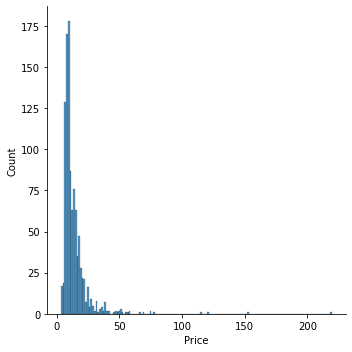

In [35]:
sns.displot(data['Price'])

<AxesSubplot:xlabel='Format', ylabel='Price'>

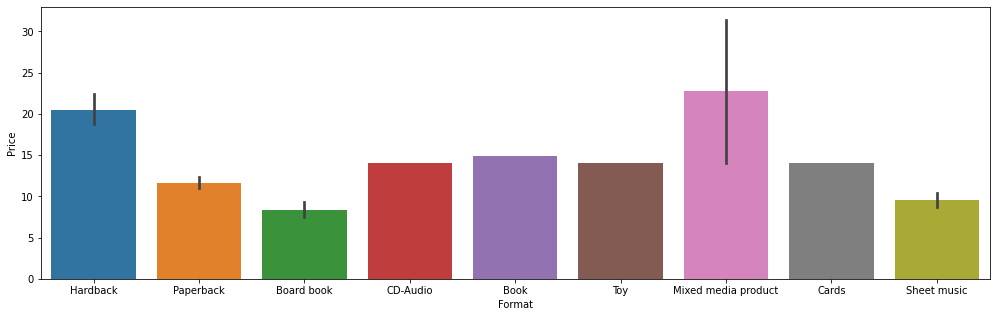

In [36]:
fig, ax = plt.subplots(figsize = ( 17, 5))
sns.barplot(x =data['Format'] , y = data['Price'])

<AxesSubplot:xlabel='Year', ylabel='Price'>

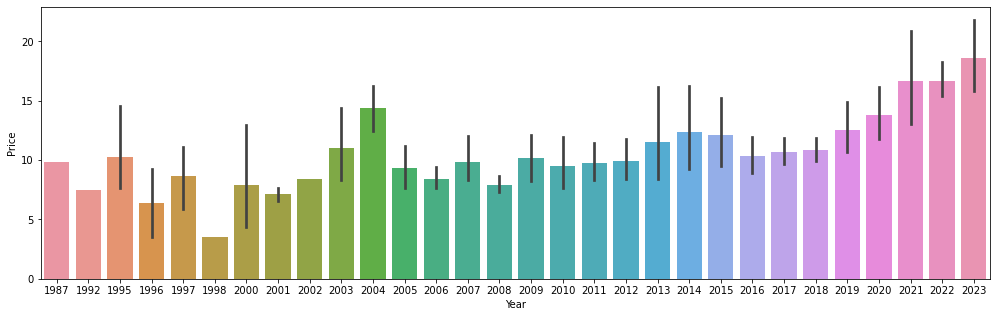

In [37]:
fig, ax = plt.subplots(figsize = ( 17, 5))
sns.barplot(x =data['Year'] , y = data['Price'])

# I have used MongoDB cloud-based database to store all my data records.

1) I have created database with name "Bestseller_DB".

2) Table/collection with name "Books_db".

In [38]:
!pip install "pymongo[srv]"

In [40]:
db.Books_db.insert_many(data.to_dict('records'))

# MangoDB URL: https://cloud.mongodb.com/v2/63961f4f6fafc15faaf2a169#metrics/replicaSet/6396217213704f0bf8506c3d/explorer/Bestseller_DB/Books_db/find

# Notebook link: http://localhost:8888/notebooks/10620794%20-%20Uma%20Dhotre%20-%20CA2.ipynb